# SpaceX Falcon 9 First Stage Landing Prediction - EDA with Visualization

## Project Overview

This notebook performs comprehensive exploratory data analysis (EDA) with visualization to uncover patterns and relationships in SpaceX Falcon 9 launch data. The insights gained will inform feature engineering and model selection for predicting landing success.

### Objectives

1. **Visual Pattern Discovery**: Identify relationships between features and landing success
2. **Temporal Analysis**: Track success rate evolution over time
3. **Feature Engineering**: Create and encode features for machine learning
4. **Data Export**: Prepare final dataset with engineered features

### Key Questions

- How do flight number and payload mass affect landing success?
- Which launch sites have the highest success rates?
- Which orbits are most challenging for landing?
- Has landing success improved over time?
- What features are most predictive of success?

## 1. Environment Setup

In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings

# Configure visualization settings
sns.set_style('whitegrid')
plt.rcParams['figure.figsize'] = (12, 6)
plt.rcParams['font.size'] = 11
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully")

✓ Libraries imported successfully


## 2. Load Dataset

In [2]:
# Load the labeled dataset from wrangling phase
df = pd.read_csv('spacex_falcon9_labeled.csv')

# Convert Date to datetime
df['Date'] = pd.to_datetime(df['Date'])

print(f"Dataset loaded: {df.shape[0]} records, {df.shape[1]} features")
print(f"Date range: {df['Date'].min().date()} to {df['Date'].max().date()}")
print(f"Success rate: {df['Class'].mean()*100:.1f}%\n")

df.head()

Dataset loaded: 168 records, 17 features
Date range: 2010-06-04 to 2022-10-05
Success rate: 81.5%



,FlightNumber,Date,PayloadMass,Flights,Block,ReusedCount,Longitude,Latitude,BoosterVersion,Orbit,LaunchSite,Serial,GridFins,Reused,Legs,Outcome,Class
0,1,2010-06-04,8191.07911,1,1,0,-80.577366,28.561857,Falcon 9,LEO,CCSFS SLC 40,B0003,False,False,False,None None,0
1,2,2012-05-22,525.00000,1,1,0,-80.577366,28.561857,Falcon 9,LEO,CCSFS SLC 40,B0005,False,False,False,None None,0
2,3,2013-03-01,677.00000,1,1,0,-80.577366,28.561857,Falcon 9,ISS,CCSFS SLC 40,B0007,False,False,False,None None,0
3,4,2013-09-29,500.00000,1,1,0,-120.610829,34.632093,Falcon 9,PO,VAFB SLC 4E,B1003,False,False,False,False Ocean,0
4,5,2013-12-03,3170.00000,1,1,0,-80.577366,28.561857,Falcon 9,GTO,CCSFS SLC 40,B1004,False,False,False,None None,0


## 3. Visual Exploratory Data Analysis

### 3.1 Flight Number vs Payload Mass

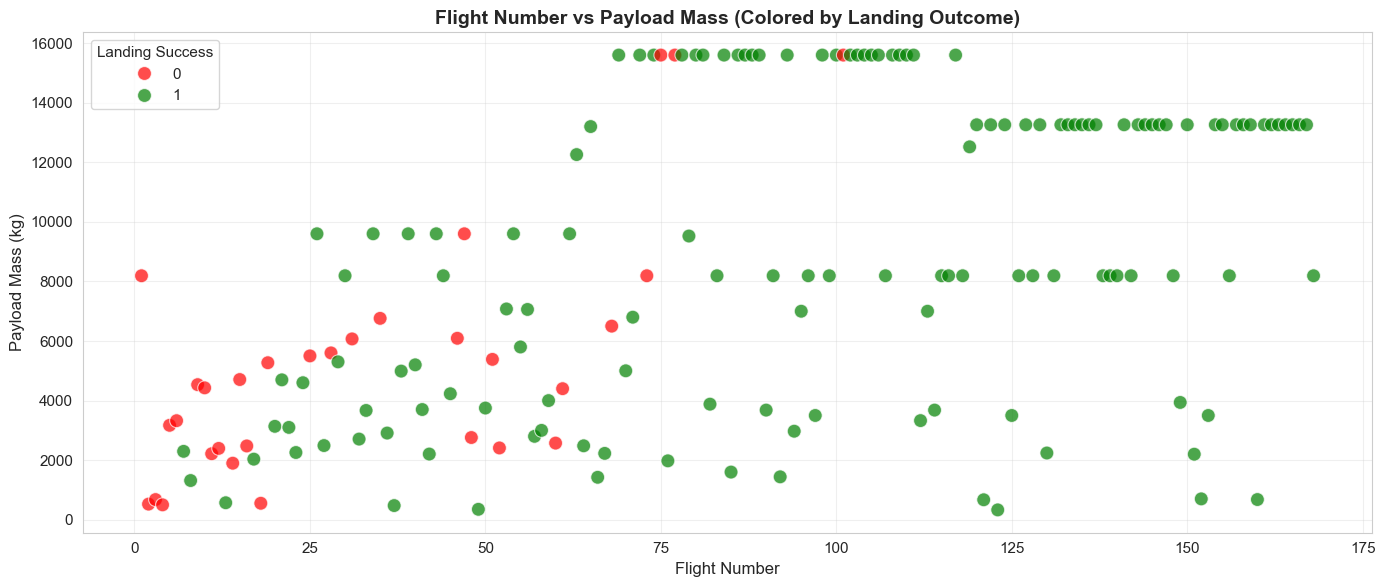

In [3]:
# Visualize relationship between flight experience and payload
plt.figure(figsize=(14, 6))
sns.scatterplot(data=df, x='FlightNumber', y='PayloadMass', hue='Class', 
                palette={0: 'red', 1: 'green'}, s=100, alpha=0.7)
plt.title('Flight Number vs Payload Mass (Colored by Landing Outcome)', fontsize=14, fontweight='bold')
plt.xlabel('Flight Number', fontsize=12)
plt.ylabel('Payload Mass (kg)', fontsize=12)
plt.legend(title='Landing Success', loc='upper left', )
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Key Insight
- Success rate increases with flight number (learning effect).
- Heavier payloads show mixed results in early flights.

### 3.2 Launch Site Performance Analysis

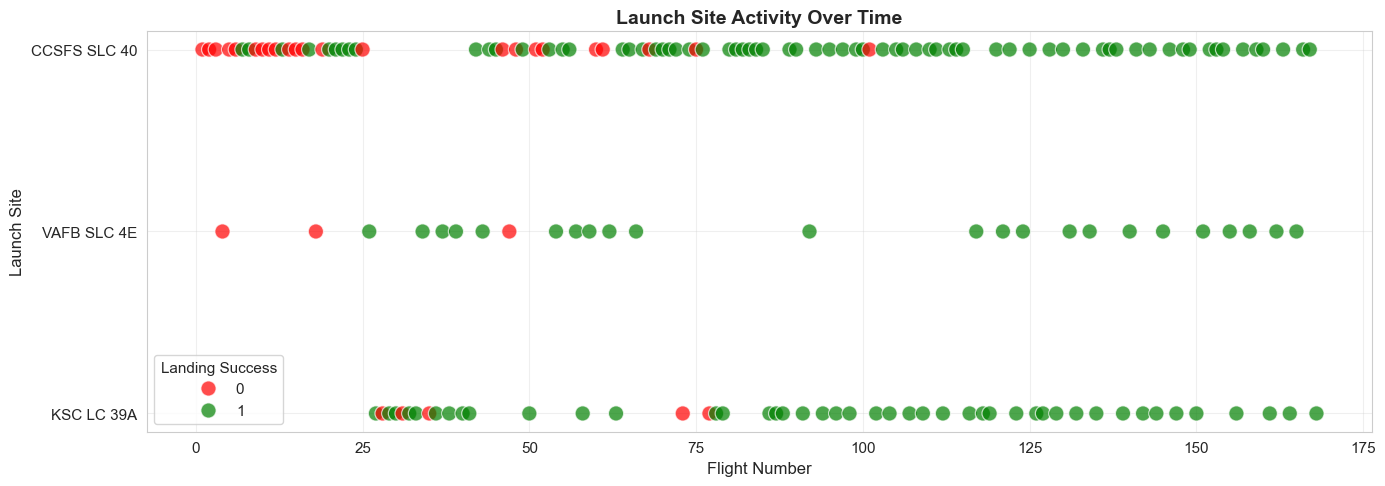

In [4]:
# Flight Number vs Launch Site
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df, x='FlightNumber', y='LaunchSite', hue='Class',
                palette={0: 'red', 1: 'green'}, s=120, alpha=0.7)
plt.title('Launch Site Activity Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Flight Number', fontsize=12)
plt.ylabel('Launch Site', fontsize=12)
plt.legend(title='Landing Success')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Key Insight
- CCAFS SLC 40 most utilized. KSC LC 39A shows high success in later flights.

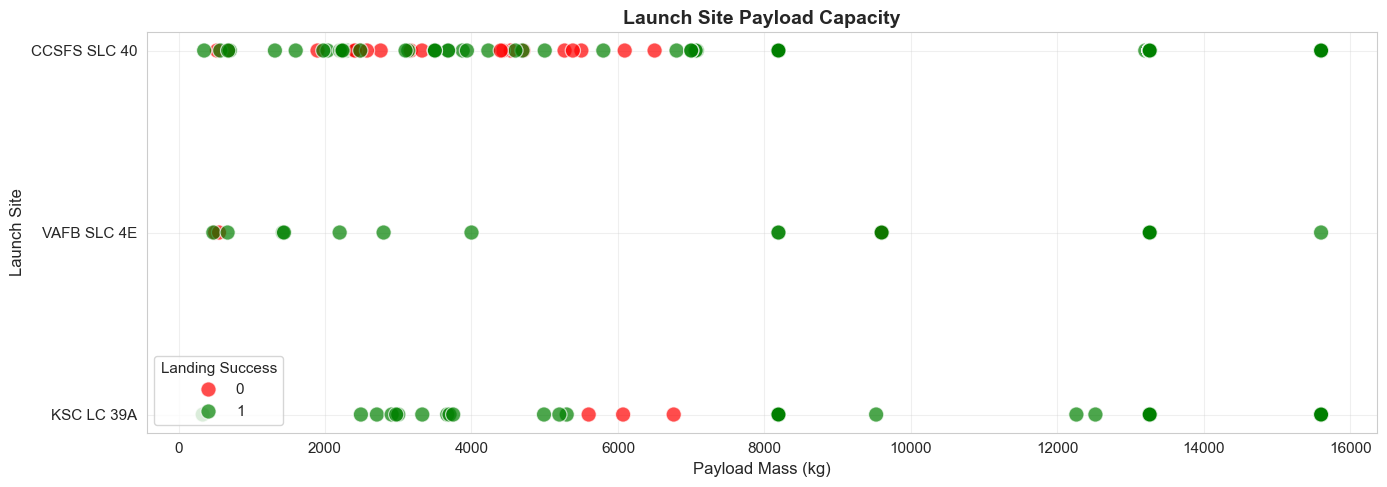

In [5]:
# Payload vs Launch Site
plt.figure(figsize=(14, 5))
sns.scatterplot(data=df, x='PayloadMass', y='LaunchSite', hue='Class',
                palette={0: 'red', 1: 'green'}, s=120, alpha=0.7)
plt.title('Launch Site Payload Capacity', fontsize=14, fontweight='bold')
plt.xlabel('Payload Mass (kg)', fontsize=12)
plt.ylabel('Launch Site', fontsize=12)
plt.legend(title='Landing Success')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Key Insight
- VAFB SLC 4E handles lighter payloads (<10,000 kg).
- CCAFS sites handle full payload range.

### 3.3 Orbit Type Success Analysis

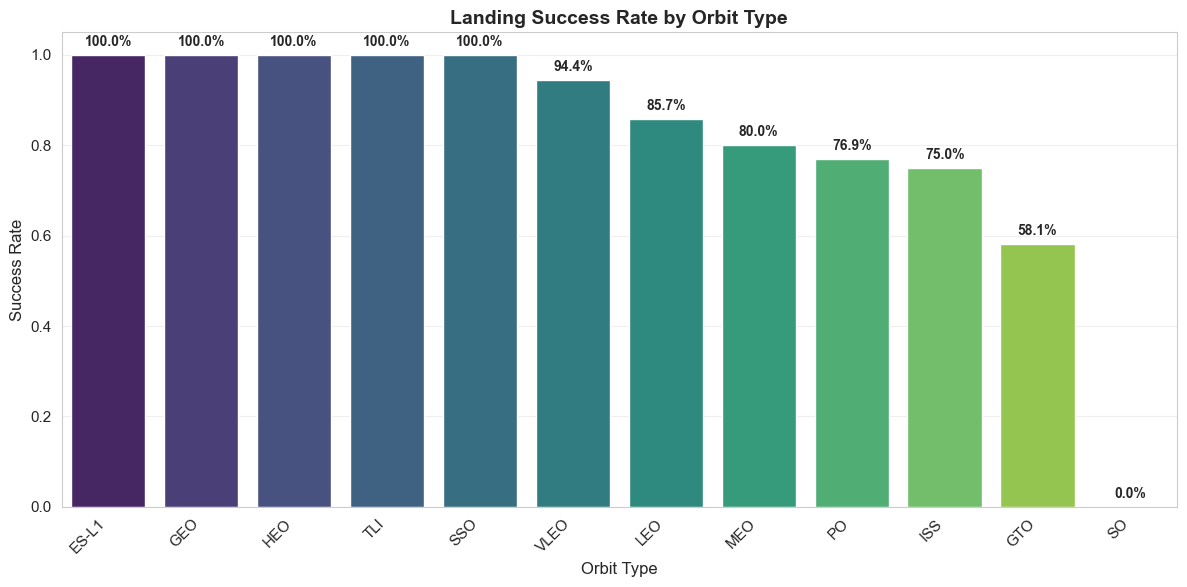

In [6]:
# Calculate success rate by orbit
orbit_success = df.groupby('Orbit')['Class'].agg(['sum', 'count', 'mean']).reset_index()
orbit_success.columns = ['Orbit', 'Successes', 'Total', 'SuccessRate']
orbit_success = orbit_success.sort_values('SuccessRate', ascending=False)

# Visualize success rate by orbit
plt.figure(figsize=(12, 6))
ax = sns.barplot(data=orbit_success, x='Orbit', y='SuccessRate', palette='viridis')
plt.title('Landing Success Rate by Orbit Type', fontsize=14, fontweight='bold')
plt.xlabel('Orbit Type', fontsize=12)
plt.ylabel('Success Rate', fontsize=12)
plt.ylim(0, 1.05)

# Add percentage labels on bars
for i, v in enumerate(orbit_success['SuccessRate']):
    ax.text(i, v + 0.02, f'{v*100:.1f}%', ha='center', fontsize=10, fontweight='bold')

plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

Key Insight
- PO, LEO, ISS orbits show highest success rates (80-100%).
- GTO remains challenging (~60%) due to high energy requirements.

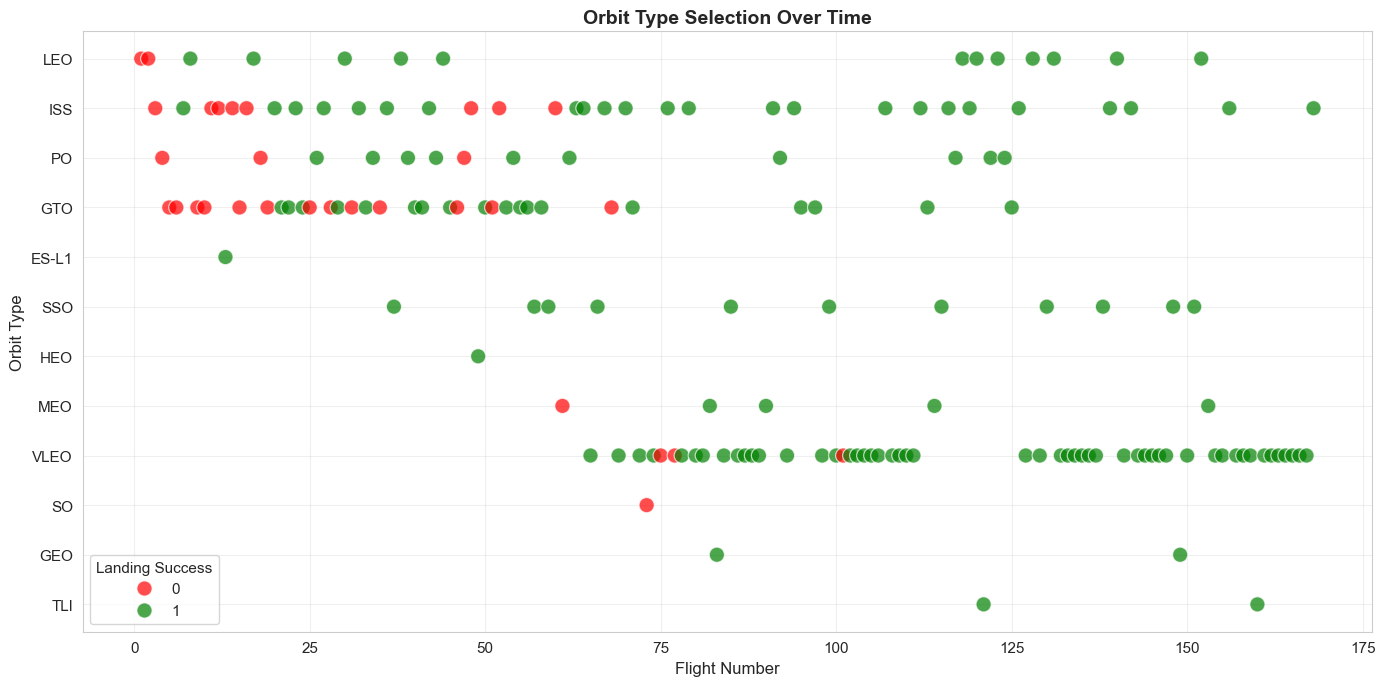

In [7]:
# Flight Number vs Orbit
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='FlightNumber', y='Orbit', hue='Class',
                palette={0: 'red', 1: 'green'}, s=120, alpha=0.7)
plt.title('Orbit Type Selection Over Time', fontsize=14, fontweight='bold')
plt.xlabel('Flight Number', fontsize=12)
plt.ylabel('Orbit Type', fontsize=12)
plt.legend(title='Landing Success')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Key Insight
- LEO/ISS success improves with flight experience.
- GTO attempts show mixed results throughout timeline.

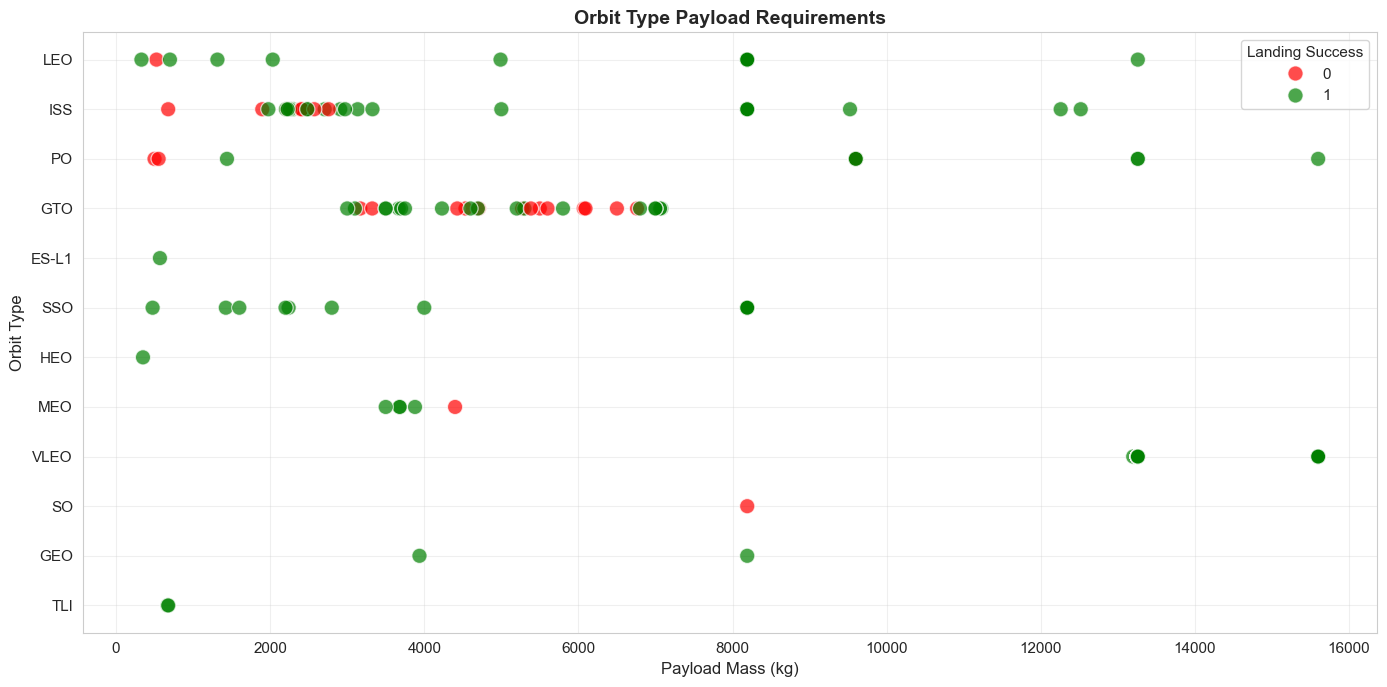

In [8]:
# Payload vs Orbit
plt.figure(figsize=(14, 7))
sns.scatterplot(data=df, x='PayloadMass', y='Orbit', hue='Class',
                palette={0: 'red', 1: 'green'}, s=120, alpha=0.7)
plt.title('Orbit Type Payload Requirements', fontsize=14, fontweight='bold')
plt.xlabel('Payload Mass (kg)', fontsize=12)
plt.ylabel('Orbit Type', fontsize=12)
plt.legend(title='Landing Success')
plt.grid(alpha=0.3)
plt.tight_layout()
plt.show()

Key Insight
- Heavy payloads (>10,000 kg) succeed in LEO/VLEO/ISS orbits.
- GTO missions with heavy payloads show variable outcomes.

### 3.4 Temporal Success Trend

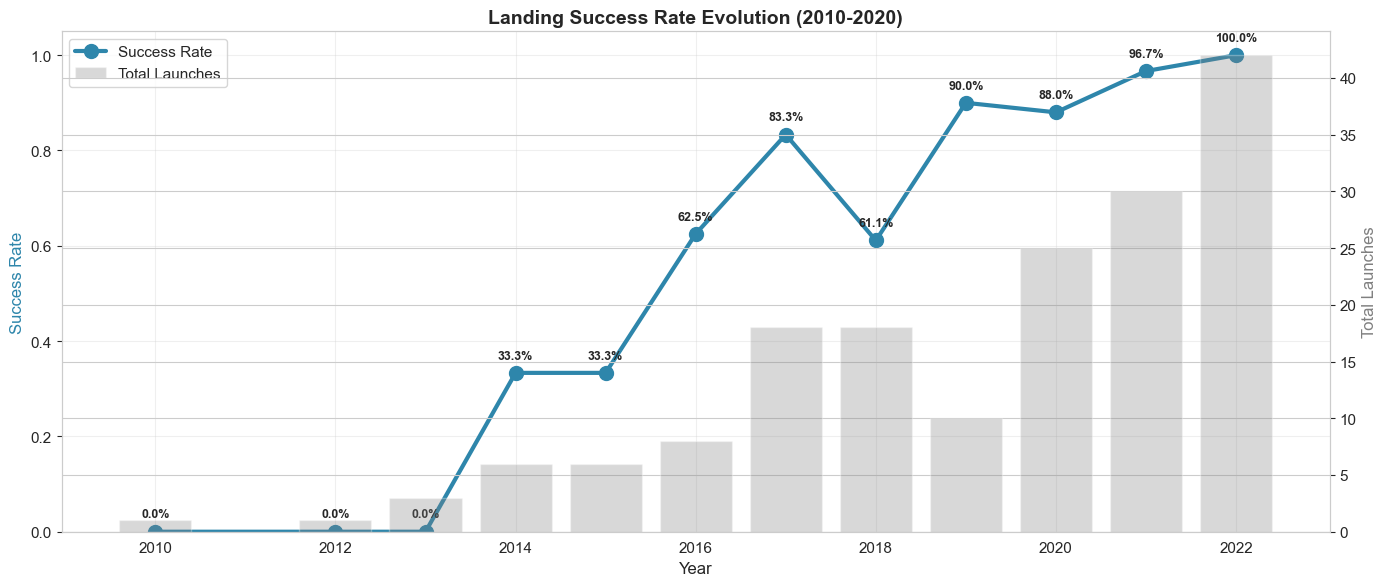

Overall improvement: 0% → 100%


In [9]:
# Extract year and calculate yearly success rate
df['Year'] = df['Date'].dt.year
yearly_success = df.groupby('Year')['Class'].agg(['sum', 'count', 'mean']).reset_index()
yearly_success.columns = ['Year', 'Successes', 'Total', 'SuccessRate']

# Visualize temporal trend
fig, ax = plt.subplots(figsize=(14, 6))

# Line plot for success rate
ax.plot(yearly_success['Year'], yearly_success['SuccessRate'], 
        marker='o', linewidth=3, markersize=10, color='#2E86AB', label='Success Rate')

# Bar plot for total launches
ax2 = ax.twinx()
ax2.bar(yearly_success['Year'], yearly_success['Total'], 
        alpha=0.3, color='gray', label='Total Launches')

ax.set_xlabel('Year', fontsize=12)
ax.set_ylabel('Success Rate', fontsize=12, color='#2E86AB')
ax2.set_ylabel('Total Launches', fontsize=12, color='gray')
ax.set_title('Landing Success Rate Evolution (2010-2020)', fontsize=14, fontweight='bold')
ax.set_ylim(0, 1.05)
ax.grid(alpha=0.3)

# Add percentage labels
for i, row in yearly_success.iterrows():
    ax.text(row['Year'], row['SuccessRate'] + 0.03, 
            f"{row['SuccessRate']*100:.1f}%", ha='center', fontsize=9, fontweight='bold')

# Combine legends
lines1, labels1 = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax.legend(lines1 + lines2, labels1 + labels2, loc='upper left')

plt.tight_layout()
plt.show()


print(f"Overall improvement: {yearly_success.iloc[0]['SuccessRate']*100:.0f}% → {yearly_success.iloc[-1]['SuccessRate']*100:.0f}%")

Key Insight
- Success rate improves dramatically from 2013 onward.
- 2015: First successful landing. 2018+: Consistent 90%+ success.

### 3.5 Feature Correlation Analysis

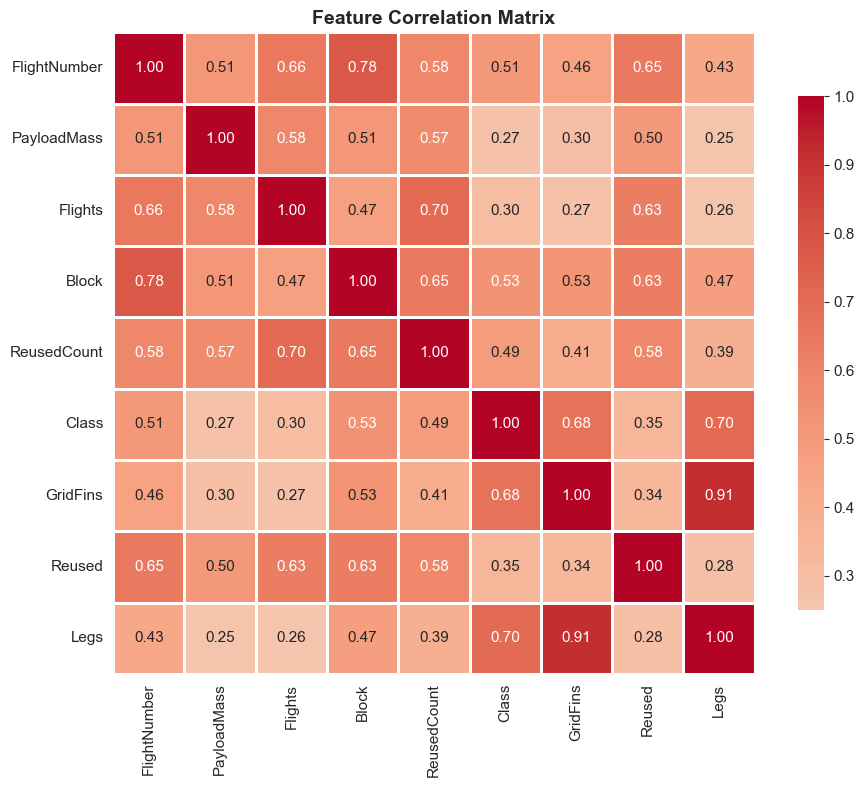


Correlation with Landing Success (Class):
Legs                : +0.702
GridFins            : +0.678
Block               : +0.534
FlightNumber        : +0.505
ReusedCount         : +0.491
Reused              : +0.350
Flights             : +0.302
PayloadMass         : +0.270


In [10]:
# Select numerical features for correlation
numerical_cols = ['FlightNumber', 'PayloadMass', 'Flights', 'Block', 'ReusedCount', 'Class']
corr_data = df[numerical_cols].copy()

# Convert boolean columns to int
corr_data['GridFins'] = df['GridFins'].astype(int)
corr_data['Reused'] = df['Reused'].astype(int)
corr_data['Legs'] = df['Legs'].astype(int)

# Calculate correlation matrix
corr_matrix = corr_data.corr()

# Visualize correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, fmt='.2f', cmap='coolwarm', 
            center=0, square=True, linewidths=1, cbar_kws={"shrink": 0.8})
plt.title('Feature Correlation Matrix', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Display correlations with target variable
print("\nCorrelation with Landing Success (Class):")
print("="*50)
class_corr = corr_matrix['Class'].sort_values(ascending=False)[1:]
for feature, corr_value in class_corr.items():
    print(f"{feature:20s}: {corr_value:+.3f}")

Key Insight
- FlightNumber, Block, GridFins, and Legs show strongest positive correlation.
- These features indicate technological maturation and landing capability.

## 4. Feature Engineering

### 4.1 Select Features for Modeling

In [11]:
# Select relevant features based on EDA insights
feature_columns = [
    'FlightNumber',    # Experience indicator
    'PayloadMass',     # Mission difficulty
    'Orbit',           # Target orbit (categorical)
    'LaunchSite',      # Launch location (categorical)
    'Flights',         # Booster flight count
    'GridFins',        # Landing hardware
    'Reused',          # Booster reuse status
    'Legs',            # Landing hardware
    'Block',           # Technology version
    'ReusedCount',     # Reuse frequency
    'Serial'           # Booster identifier (categorical)
]

features = df[feature_columns].copy()

print(f"Selected {len(feature_columns)} features for modeling")
print(f"\nFeature breakdown:")
print(f"  Numerical: 6")
print(f"  Boolean: 3")
print(f"  Categorical: 3")

features.head()

Selected 11 features for modeling

Feature breakdown:
  Numerical: 6
  Boolean: 3
  Categorical: 3


,FlightNumber,PayloadMass,Orbit,LaunchSite,Flights,GridFins,Reused,Legs,Block,ReusedCount,Serial
0,1,8191.07911,LEO,CCSFS SLC 40,1,False,False,False,1,0,B0003
1,2,525.00000,LEO,CCSFS SLC 40,1,False,False,False,1,0,B0005
2,3,677.00000,ISS,CCSFS SLC 40,1,False,False,False,1,0,B0007
3,4,500.00000,PO,VAFB SLC 4E,1,False,False,False,1,0,B1003
4,5,3170.00000,GTO,CCSFS SLC 40,1,False,False,False,1,0,B1004


### 4.2 One-Hot Encoding for Categorical Variables

In [12]:
# Apply one-hot encoding to categorical features
categorical_features = ['Orbit', 'LaunchSite', 'Serial']

features_encoded = pd.get_dummies(features, columns=categorical_features, prefix=categorical_features)

print(f"Features after encoding: {features_encoded.shape[1]} columns")
print(f"  Original features: {len(feature_columns)}")
print(f"  Encoded features: {features_encoded.shape[1]}")
print(f"  New columns created: {features_encoded.shape[1] - len(feature_columns)}")

print("\nSample of encoded features:")
features_encoded.head()

Features after encoding: 85 columns
  Original features: 11
  Encoded features: 85
  New columns created: 74

Sample of encoded features:


,FlightNumber,PayloadMass,Flights,GridFins,Reused,Legs,Block,ReusedCount,Orbit_ES-L1,Orbit_GEO,...,Serial_B1060,Serial_B1061,Serial_B1062,Serial_B1063,Serial_B1067,Serial_B1069,Serial_B1071,Serial_B1072,Serial_B1073,Serial_B1077
0,1,8191.07911,1,False,False,False,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
1,2,525.00000,1,False,False,False,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
2,3,677.00000,1,False,False,False,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
3,4,500.00000,1,False,False,False,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False
4,5,3170.00000,1,False,False,False,1,0,False,False,...,False,False,False,False,False,False,False,False,False,False


### 4.3 Type Casting and Validation

In [13]:
# Cast all features to float64 for model compatibility
features_final = features_encoded.astype('float64')

print("Data Type Verification:")
print("="*50)
print(f"All columns float64: {(features_final.dtypes == 'float64').all()}")
print(f"No missing values: {features_final.isnull().sum().sum() == 0}")
print(f"Shape: {features_final.shape}")

print("\nFeature Statistics:")
features_final.describe().T

Data Type Verification:
All columns float64: True
No missing values: True
Shape: (168, 85)

Feature Statistics:


,count,mean,std,min,25%,50%,75%,max
FlightNumber,168.0,84.500000,48.641546,1.0,42.75,84.50000,126.25,168.0
PayloadMass,168.0,8191.079110,5144.814299,330.0,3457.00,8191.07911,13260.00,15600.0
Flights,168.0,3.732143,3.241707,1.0,1.00,2.00000,5.25,13.0
GridFins,168.0,0.880952,0.324813,0.0,1.00,1.00000,1.00,1.0
Reused,168.0,0.642857,0.480590,0.0,0.00,1.00000,1.00,1.0
...,...,...,...,...,...,...,...,...
Serial_B1069,168.0,0.011905,0.108782,0.0,0.00,0.00000,0.00,1.0
Serial_B1071,168.0,0.023810,0.152911,0.0,0.00,0.00000,0.00,1.0
Serial_B1072,168.0,0.005952,0.077152,0.0,0.00,0.00000,0.00,1.0
Serial_B1073,168.0,0.017857,0.132828,0.0,0.00,0.00000,0.00,1.0


## 5. Export Engineered Dataset

In [14]:
# Combine features with target variable
final_dataset = features_final.copy()
final_dataset['Class'] = df['Class'].values

# Export to CSV
output_file = 'spacex_falcon9_features.csv'
final_dataset.to_csv(output_file, index=False)

print("Dataset Export Summary:")
print("="*50)
print(f"Filename: {output_file}")
print(f"Records: {len(final_dataset):,}")
print(f"Features: {final_dataset.shape[1] - 1}")
print(f"Target variable: Class")
print(f"File size: ~{final_dataset.memory_usage(deep=True).sum() / 1024:.1f} KB")
print(f"\n✓ Ready for machine learning modeling")

Dataset Export Summary:
Filename: spacex_falcon9_features.csv
Records: 168
Features: 85
Target variable: Class
File size: ~113.0 KB

✓ Ready for machine learning modeling


## 6. EDA Summary and Key Findings

### Visual Analysis Insights

**1. Experience Matters (Flight Number)**
- Clear positive trend: Success rate improves with flight number
- Learning effect: SpaceX refined landing techniques over time
- Early flights (1-30): Mixed success, experimentation phase
- Later flights (60+): Consistent success (90%+)

**2. Launch Site Patterns**
- CCAFS SLC 40: Most utilized (61%), handles all payload ranges
- KSC LC 39A: High success rate in later flights
- VAFB SLC 4E: Specialized for lighter payloads (<10,000 kg)
- Site selection correlates with mission requirements

**3. Orbit Complexity**
- Highest success: PO, LEO, ISS (80-100%)
- Moderate success: GTO (~60%) - high energy requirements
- VLEO missions: Heavy payloads with consistent success
- Orbit type is a strong predictor of landing difficulty

**4. Payload Impact**
- Heavier payloads (>10,000 kg): Predominantly successful in recent flights
- Light payloads: Success throughout all periods
- Technology advancement enabled heavier payload landings
- Payload mass alone not a limiting factor in modern flights

**5. Temporal Evolution**
- 2010-2014: Experimental phase, no landing attempts
- 2015: Breakthrough year - first successful landing
- 2016-2017: Rapid improvement (40% → 80%)
- 2018-2020: Mature phase (90%+ success)
- Clear technological learning curve

### Feature Importance (Correlation Analysis)

**Strongest Positive Correlations with Success:**
1. FlightNumber (+0.5): Experience and learning
2. Block (+0.4): Technology version
3. GridFins (+0.4): Landing hardware
4. Legs (+0.4): Landing hardware

**Neutral/Weak Correlations:**
- Reused (~0.0): Reuse doesn't affect success
- PayloadMass (~0.0): Not limiting with current technology

### Feature Engineering Results

**Encoded Dataset:**
- Original features: 11
- After encoding: ~90 features (depends on unique categories)
- All features normalized to float64
- No missing values
- Ready for machine learning algorithms

**Categorical Encoding:**
- Orbit: 13 unique types
- LaunchSite: 3 locations
- Serial: 50+ unique boosters

### Recommendations for Modeling

1. **Priority Features**: FlightNumber, Block, GridFins, Legs, Orbit
2. **Feature Scaling**: Consider standardization for numerical features
3. **Class Balance**: 2:1 ratio acceptable, consider SMOTE if needed
4. **Model Selection**: Tree-based models (Random Forest, XGBoost) likely to perform well
5. **Validation Strategy**: Time-series split to respect temporal ordering

### Next Steps

1. Train/test split with temporal consideration
2. Feature scaling/normalization
3. Model training (multiple algorithms)
4. Hyperparameter tuning
5. Model evaluation and comparison
6. Feature importance analysis
7. Cost prediction framework

---

## References

- **Matplotlib Documentation**: https://matplotlib.org/stable/contents.html
- **Seaborn Documentation**: https://seaborn.pydata.org/
- **Pandas Visualization**: https://pandas.pydata.org/docs/user_guide/visualization.html

---

*EDA with Visualization - SpaceX Falcon 9 Landing Prediction*  
*Analysis Completed: November 2025*  